In [ ]:
**Project data information
https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#
Abstract: This hourly data set considersing.
Source:
Song Xi Chen, csx '@' gsm.pku.edu.cn, Guanghua School of Management, Center for Statistical Science, Peking University.
Data Set Information:
This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. 
The air-quality data are from the Beijing Municipal Environmental Monitoring Center. 
The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration.
The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

Attribute Information:
No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
PM2.5: PM2.5 concentration (ug/m^3)
PM10: PM10 concentration (ug/m^3)
SO2: SO2 concentration (ug/m^3)
NO2: NO2 concentration (ug/m^3)
CO: CO concentration (ug/m^3)
O3: O3 concentration (ug/m^3)
TEMP: temperature (degree Celsius)
PRES: pressure (hPa)
DEWP: dew point temperature (degree Celsius)
RAIN: precipitation (mm)
wd: wind direction
WSPM: wind speed (m/s)
station: name of the air-quality monitoring site

Relevant Papers:
Zhang, S., Guo, B., Dong, A., He, J., Xu, Z. and Chen, S.X. (2017) Cautionary Tales on Air-Quality Improvement in Beijing. 
Proceedings of the Royal Society A, Volume 473, No. 2205, Pages 20170457.


In [1]:
# NumPy deals with:
#1.mathematical and logical operations
#2.calulate mean,std,and describe statistics functions
#Pandas deals with:
#1.import database to dataframe
#2.reshape,clean and pivot of data sets
import numpy as np
import pandas as pd

In [2]:
# load data from csv file in folder AIR_DATA as dataframe
df_CP=pd.read_csv('AIR_DATA/Changping.csv')

# show detail data information: total 35064 rows, 18 columns, and data type
df_CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34290 non-null float64
PM10       34482 non-null float64
SO2        34436 non-null float64
NO2        34397 non-null float64
CO         33543 non-null float64
O3         34460 non-null float64
TEMP       35011 non-null float64
PRES       35014 non-null float64
DEWP       35011 non-null float64
RAIN       35013 non-null float64
wd         34924 non-null object
WSPM       35021 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [3]:
# using describe function show mean, standard deviation, max, min and percentiles
df_CP['PM2.5'].describe().round(2)

count    34290.00
mean        71.10
std         72.33
min          2.00
25%         18.00
50%         46.00
75%        100.00
max        882.00
Name: PM2.5, dtype: float64

In [4]:
# show record NO. 1814 to 1816, there are missing value at PM2.5 columns
df_CP.iloc[1813:1816]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1813,1814,2013,5,15,13,53.0,100.0,52.0,29.0,1200.0,131.0,27.5,1006.3,1.8,0.0,SW,1.9,Changping
1814,1815,2013,5,15,14,NaN,70.0,46.0,22.0,1100.0,157.0,27.7,1005.8,2.0,0.0,SE,3.2,Changping
1815,1816,2013,5,15,15,NaN,71.0,39.0,19.0,1100.0,188.0,27.9,1005.2,4.2,0.0,SSE,1.6,Changping


In [5]:
# fill NaN value with forward value.
df_CP.fillna( method ='ffill', inplace = True)
df_CP.iloc[1813:1816]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1813,1814,2013,5,15,13,53.0,100.0,52.0,29.0,1200.0,131.0,27.5,1006.3,1.8,0.0,SW,1.9,Changping
1814,1815,2013,5,15,14,53.0,70.0,46.0,22.0,1100.0,157.0,27.7,1005.8,2.0,0.0,SE,3.2,Changping
1815,1816,2013,5,15,15,53.0,71.0,39.0,19.0,1100.0,188.0,27.9,1005.2,4.2,0.0,SSE,1.6,Changping


In [6]:
#Group by data for aggregation and transformations.
# show records by monthly from 2013 to 2017
df_CP_year=df_CP.groupby(['year','month']).mean()

# Create a drop list, so that it can use it in next dateframe
drop_list=['No','day','hour','SO2','NO2','CO','O3','PRES','DEWP','RAIN']

# Drop columns from dataframe
df_CP_year.drop(drop_list,axis=1,inplace=True)
df_CP_year.round(2)

PM2.5    PM10   TEMP  WSPM
year month                             
2013 3       98.92  123.43   5.90  1.72
     4       59.69   90.05  12.41  2.23
     5       82.99  118.17  21.99  1.86
     6       81.04  102.32  23.71  1.25
     7       61.98   64.94  27.27  1.35
     8       55.35   67.43  26.97  1.45
     9       73.30   82.98  20.38  1.12
     10      82.51   99.91  13.43  1.33
     11      60.78   81.32   6.70  2.11
     12      67.15   80.84   0.84  2.06
2014 1       88.30  109.95  -0.01  1.89
     2      143.49  150.54  -0.42  1.73
     3       86.00  127.85  10.08  1.95
     4      105.65  140.63  17.33  1.83
     5       53.96  100.34  22.03  2.31
     6       45.04   59.51  25.14  1.66
     7       78.22  101.25  28.36  1.80
     8       56.56   75.98  26.36  1.72
     9       60.42   78.71  20.80  1.53
     10     118.53  138.47  13.62  1.45
     11      76.89  118.62   6.36  1.85
     12      52.99   90.15  -0.57  2.68
2015 1       97.05  115.28  -0.63  1.86
     2       86.95  116.48   1.59  2.22
     3       78.47  144.38   8.76  2.11
     4       61.99   99.59  15.67  2.18
     5       54.63   87.29  21.39  2.19
     6       57.68   74.95  24.59  1.88
     7       56.10   66.56  26.25  1.62
     8       38.59   56.85  26.23  1.46
     9       42.96   50.74  20.40  1.43
     10      46.56   66.15  14.44  1.97
     11      90.55   99.19   3.22  1.33
     12     120.23  146.50   0.03  1.87
2016 1       54.82   80.98  -4.15  2.67
     2       37.37   58.09   1.44  2.74
     3       73.02  125.01   8.85  2.10
     4       56.92  106.52  16.33  2.43
     5       50.80   80.30  21.06  2.16
     6       52.99   67.38  25.39  1.86
     7       54.93   67.84  27.11  1.65
     8       36.76   52.68  27.19  1.64
     9       44.16   56.34  21.40  1.55
     10      79.84   96.27  12.82  1.52
     11      85.79  119.69   4.12  1.78
     12     109.84  125.64   0.10  1.73
2017 1       98.30  113.93  -1.39  2.03
     2       59.23   72.21   2.38  2.22

In [7]:
#new dataframe include: PM2.5	PM10	TEMP	WSPM four columns, 48 rows
df_CP_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, (2013, 3) to (2017, 2)
Data columns (total 4 columns):
PM2.5    48 non-null float64
PM10     48 non-null float64
TEMP     48 non-null float64
WSPM     48 non-null float64
dtypes: float64(4)
memory usage: 1.8 KB


In [8]:
# groupby month, show average data from Jan. to Dec.
df_CP_month=df_CP.groupby(['month']).mean()
df_CP_month.drop(drop_list,axis=1,inplace=True)
df_CP_month.drop(['year'],axis=1,inplace=True)
df_CP_month.round(2)

,PM2.5,PM10,TEMP,WSPM
month,,,,
1,84.62,105.04,-1.55,2.11
2,81.37,98.97,1.25,2.23
3,84.10,130.17,8.40,1.97
4,71.06,109.20,15.44,2.17
5,60.59,96.53,21.62,2.13
6,59.19,76.04,24.71,1.66
7,62.81,75.15,27.25,1.60
8,46.82,63.24,26.69,1.57
9,55.21,67.19,20.75,1.41


In [9]:
# Plotly is an interactive visualization library.
# Cufflinks connects plotly with pandas
import cufflinks as cf

# it also has open source that you can use offline
# to use the open source offline you need to type the following line
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For Notebooks
# the following will connect the javascript to your notebook
# plotly connects python pandas to interactive javascript library
# the following line allows you to connect to those interactive visualization
init_notebook_mode(connected=True)
cf.go_offline()

# seaborn is used to create more attractive and informative statistical graphics.
# it is built on top of MatPlotLib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  four columns is shown by plotly interactive image,
df_CP_year.iplot(kind='scatter',mode='markers',size=10)

In [10]:
# show default plot which is the line graphs.
df_CP_year.iplot(y=['TEMP','WSPM'])

In [11]:
# Matrix form for correlation data
df_CP_year[['PM2.5','PM10','TEMP','WSPM']].corr().round(3)

,PM2.5,PM10,TEMP,WSPM
PM2.5,1.000,0.879,-0.503,-0.204
PM10,0.879,1.000,-0.510,0.085
TEMP,-0.503,-0.510,1.000,-0.453
WSPM,-0.204,0.085,-0.453,1.000


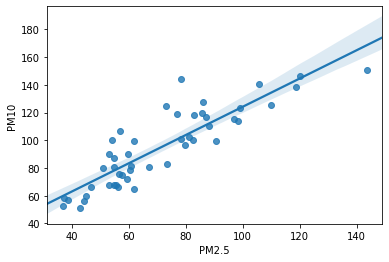

In [12]:
# using regression line show correlation between PM2.5 & PM10
sns.regplot(x='PM2.5',y='PM10',data=df_CP_year)

In [13]:
# same as: read csv file for Dongsi, fillna, groupby,drop extra columns
df_DS=pd.read_csv('AIR_DATA/Dongsi.csv')
df_DS.fillna( method ='ffill', inplace = True)
df_DS_year=df_DS.groupby(['year','month']).mean()
df_DS_year.drop(drop_list,axis=1,inplace=True)

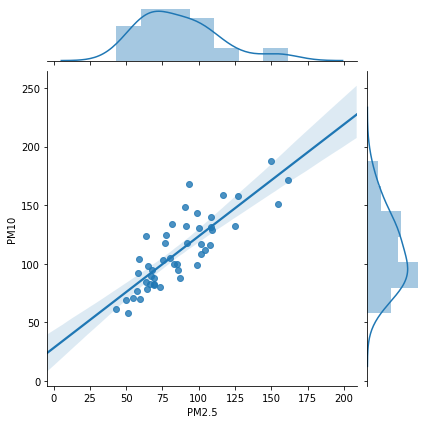

In [14]:
# it show a regression line on the scattered point data,they are strong relationship
sns.jointplot(x='PM2.5', y='PM10', data=df_DS_year,kind='reg')

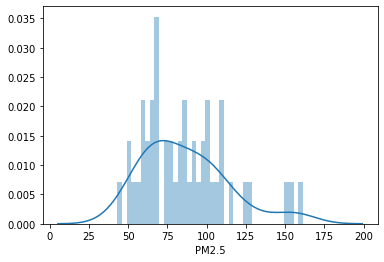

In [15]:
# show how the PM10 distributed, it is not nomal distribute
sns.distplot(df_DS_year['PM2.5'],bins=40)

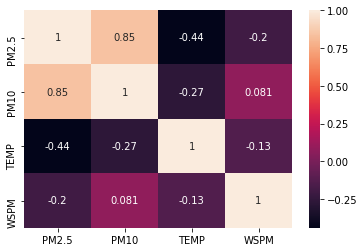

In [16]:
# same as before: read csv file for Huairou, fillna, groupby,drop extra columns
df_HR=pd.read_csv('AIR_DATA/Huairou.csv')
df_HR.fillna( method ='ffill', inplace = True)
df_HR_year=df_HR.groupby(['year','month']).mean()
df_HR_year.drop(drop_list,axis=1,inplace=True)
df_HR_year.round(2)

# using heatmap show matrix form for correlation data
sns.heatmap(df_HR_year.corr(),annot=True)

In [17]:
# same as before: read csv file for SHUNYI, fillna, groupby,drop extra columns
df_SY=pd.read_csv('AIR_DATA/SHUNYI.csv')
df_SY.fillna( method ='ffill', inplace = True)
df_SY_year=df_SY.groupby(['year','month']).mean()
df_SY_year.drop(drop_list,axis=1,inplace=True)
df_SY_year.round(2)

# pivoting table by month and year
df_SY_year.pivot_table(index='month',columns='year',values='PM2.5').round(2)

year,2013,2014,2015,2016,2017
month,,,,,
1,NaN,93.56,99.70,70.45,117.86
2,NaN,160.51,91.83,49.31,70.22
3,105.16,97.76,87.97,97.76,NaN
4,57.91,87.98,74.28,76.96,NaN
5,80.04,64.43,58.23,66.05,NaN
6,105.80,55.88,64.66,56.30,NaN
7,67.67,95.30,62.20,64.14,NaN
8,60.40,62.87,43.83,46.68,NaN
9,72.48,72.70,48.66,56.04,NaN


In [18]:
# only sign column PM10 to a new dataframe, so that it can concatenate.
df_CP_CON=df_CP_year[['PM2.5']].round(2)
df_DS_CON=df_DS_year[['PM2.5']].round(2)
df_HR_CON=df_HR_year[['PM2.5']].round(2)
df_SY_CON=df_SY_year[['PM2.5']].round(2)

In [19]:
# use .concat() function concat a dataframe and returns a new dataframe.
#  set axes join = inner for intersection of dataframe
df_BJ_year=pd.concat([df_CP_CON,df_DS_CON,df_HR_CON,df_SY_CON,], axis=1, join='inner')

# change columns name using a list
df_BJ_year.columns=['CP','DS','HR','SY']
df_BJ_year.iplot()

In [20]:
# using boxplot to show percentile
df_BJ_year.iplot(kind='box')

In [21]:
# the self define function changes the numeric to Categorial value 
def BJ_Air(num):

    if num>=110:
        text='Hazardous'
    elif num>=90:
        text='Unhealthy'
    elif num>=70:
        text='healthy'
    elif num<70:
        text='Good'
    return text
    
#df_BJ_year['BJ_Air']=list_BJ
#df_BJ_year.loc[(df_BJ_year['CP']>=120),'BJ_Air']='Hazardous'
#df_BJ_year.loc[(df_BJ_year['CP']>=100) & (df_BJ_year['CP']<120),'BJ_Air']='Unhealthy'
#df_BJ_year.loc[(df_BJ_year['CP']>=80) & (df_BJ_year['CP']<100),'BJ_Air']='healthy'
#df_BJ_year.loc[(df_BJ_year['CP']<=80),'BJ_Air']='Good'

In [22]:
# Using BJ_Air function to add new columns in the data set
df_BJ_year['CP_Air'] = df_BJ_year['CP'].apply(BJ_Air)
df_BJ_year['DS_Air'] = df_BJ_year['DS'].apply(BJ_Air)
df_BJ_year['HR_Air'] = df_BJ_year['HR'].apply(BJ_Air)
df_BJ_year['SY_Air'] = df_BJ_year['SY'].apply(BJ_Air)
df_BJ_year.head(15)

CP      DS      HR      SY     CP_Air     DS_Air     HR_Air  \
year month                                                                    
2013 3       98.92  108.54   96.19  105.16  Unhealthy  Unhealthy  Unhealthy   
     4       59.69   65.29   57.35   57.91       Good       Good       Good   
     5       82.99   91.45   88.22   80.04    healthy  Unhealthy    healthy   
     6       81.04  107.48   74.96  105.80    healthy  Unhealthy    healthy   
     7       61.98   73.60   62.10   67.67       Good    healthy       Good   
     8       55.35   66.95   56.20   60.40       Good       Good       Good   
     9       73.30   85.27   69.00   72.48    healthy    healthy       Good   
     10      82.51  101.23   77.41   83.16    healthy  Unhealthy    healthy   
     11      60.78   82.95   58.51   66.97       Good    healthy       Good   
     12      67.15   85.68   58.28   64.46       Good    healthy       Good   
2014 1       88.30  104.02   86.46   93.56    healthy  Unhealthy    healthy   
     2      143.49  154.26  148.20  160.51  Hazardous  Hazardous  Hazardous   
     3       86.00   99.88   90.46   97.76    healthy  Unhealthy  Unhealthy   
     4      105.65   90.22   84.91   87.98  Unhealthy  Unhealthy    healthy   
     5       53.96   63.79   51.49   64.43       Good       Good       Good   

               SY_Air  
year month             
2013 3      Unhealthy  
     4           Good  
     5        healthy  
     6      Unhealthy  
     7           Good  
     8           Good  
     9        healthy  
     10       healthy  
     11          Good  
     12          Good  
2014 1      Unhealthy  
     2      Hazardous  
     3      Unhealthy  
     4        healthy  
     5           Good

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
#import required libraries
from scipy.stats import normaltest
import scipy.stats as stats

In [25]:
# p-value is less than 0.05, PM2.5 is not normal distribution
stats.normaltest(df_CP_year['PM2.5'])

NormaltestResult(statistic=6.896295706386154, pvalue=0.03180448844162603)

In [26]:
# Right-tailed ztest. Because the p-value is 0.0039, which is smaller than the significance level of 0.05,
# the decision is to support alternative hypothesis.
from statsmodels.stats.weightstats import ztest
(test_statistic, p_value) = ztest(df_CP_year['PM2.5'], value=62, alternative='larger', ddof=1.0)
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  2.66078
The p-value is:  0.0039


In [27]:
# Left-tailed ztest. Because the p-value is 0.9961, which is greater than the significance level of 0.05,
#the decision is  to reject the alternative hypothesis. 
(test_statistic, p_value) = ztest(df_CP_year['PM2.5'], value=62, alternative='smaller', ddof=1.0)
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  2.66078
The p-value is:  0.9961


In [28]:
# show the mean of PM2.5 in the column
print("The mean of PM2.5 is: ", round(df_CP_year['PM2.5'].mean(),5))

The mean of PM2.5 is:  71.17278
